## Download the Flow Pass object dataset

In [ ]:
from huggingface_hub import login, snapshot_download

# Login to Hugging Face using the token
print("Logging into Hugging Face...")
hf_token = userdata.get("hf_token")
login(token=hf_token)

# Specify repository and folder details
repo_id = "BGLab/FlowBench"  # Repository ID on Hugging Face
dataset_path = "FPO_NS_2D_1024x256/harmonics/1"  # Folder path within the repository
output_dir = "/content/sample_data"  # Local directory to save the folder

# Download the entire repository or specific folder
print(f"Downloading folder '{dataset_path}' from repository '{repo_id}'...")
snapshot_download(repo_id, repo_type="dataset", local_dir=output_dir, allow_patterns=[f"{dataset_path}/*"])

print(f"Folder downloaded successfully to {output_dir}!")

Logging into Hugging Face...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

FPO_NS_2D_1024x256/harmonics/1/Re_382.np(…):   0%|          | 0.00/1.45G [00:00<?, ?B/s]

FPO_NS_2D_1024x256/harmonics/1/Re_841.np(…):   0%|          | 0.00/1.44G [00:00<?, ?B/s]

FPO_NS_2D_1024x256/harmonics/1/Re_603.np(…):   0%|          | 0.00/1.44G [00:00<?, ?B/s]

FPO_NS_2D_1024x256/harmonics/1/input_geo(…):   0%|          | 0.00/3.15M [00:00<?, ?B/s]

Folder downloaded successfully to /content/sample_data!


## Load and inspect the dataset

In [ ]:
import numpy as np
import os

folder_path = "/content/sample_data/FPO_NS_2D_1024x256/harmonics/1"

# List all NPZ files
files = [f for f in os.listdir(folder_path) if f.endswith(".npz")]

print("Found NPZ files:", files)
print("\n")

# Loop through each .npz file and show shapes
for f in files:
    file_path = os.path.join(folder_path, f)
    print(f"====== {f} ======")

    data = np.load(file_path)

    for key in data.files:
        arr = data[key]
        print(f"{key}: shape = {arr.shape}")

    print("\n")


Found NPZ files: ['input_geometry.npz', 'Re_841.npz', 'Re_603.npz', 'Re_382.npz']


====== input_geometry.npz ======
data: shape = (256, 1024)
mask: shape = (256, 1024)


====== Re_841.npz ======
data: shape = (242, 256, 1024, 3)


====== Re_603.npz ======
data: shape = (242, 256, 1024, 3)


====== Re_382.npz ======
data: shape = (242, 256, 1024, 3)




In [ ]:
import numpy as np

file_path = "/content/sample_data/FPO_NS_2D_1024x256/harmonics/1/input_geometry.npz"

# Load file
data = np.load(file_path)

# Show keys inside the npz
print("Keys inside file:", data.files, "\n")

# Loop through each array and print its shape and a small sample
for key in data.files:
    arr = data[key]
    print(f"--- {key} ---")
    print("Shape:", arr.shape)

    # Print a small 5x5 sample (or first few values if 1D)
    if arr.ndim == 2:
        print("Sample (5x5):")
        print(arr[:5, :5])
    elif arr.ndim == 3:
        print("Sample (first channel, 5x5):")
        print(arr[0, :5, :5])
    else:
        print("Sample:", arr.flat[:10])  # first 10 values

    print("\n")


Keys inside file: ['data', 'mask'] 

--- data ---
Shape: (256, 1024)
Sample (5x5):
[[2.4274787  2.41690546 2.40638732 2.395925   2.38551924]
 [2.41599571 2.405372   2.3948032  2.38429005 2.37383328]
 [2.40455981 2.39388535 2.38326561 2.37270134 2.36219328]
 [2.39317168 2.38244619 2.37177524 2.36115956 2.3505999 ]
 [2.38183201 2.37105522 2.36033277 2.34966539 2.33905384]]


--- mask ---
Shape: (256, 1024)
Sample (5x5):
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]




In [ ]:
import numpy as np

file_path = "/content/sample_data/FPO_NS_2D_1024x256/harmonics/1/input_geometry.npz"

# Load file
data = np.load(file_path)

print("Keys inside file:", data.files, "\n")

# Loop through keys
for key in data.files:
    arr = data[key]
    print(f"========== {key} ==========")
    print("Shape:", arr.shape)

    # Sample values
    if arr.ndim == 2:
        print("\nSample (5x5):")
        print(arr[:5, :5])
    elif arr.ndim == 3:
        print("\nSample (first channel, 5x5):")
        print(arr[0, :5, :5])
    else:
        print("\nSample (first 10 values):")
        print(arr.flat[:10])

    # Unique values
    print("\nUnique values (showing up to first 50):")
    unique_vals = np.unique(arr)
    if len(unique_vals) > 50:
        print(unique_vals[:50], "... (total unique:", len(unique_vals), ")")
    else:
        print(unique_vals)

    print("\n")


Keys inside file: ['data', 'mask'] 

========== data ==========
Shape: (256, 1024)

Sample (5x5):
[[2.4274787  2.41690546 2.40638732 2.395925   2.38551924]
 [2.41599571 2.405372   2.3948032  2.38429005 2.37383328]
 [2.40455981 2.39388535 2.38326561 2.37270134 2.36219328]
 [2.39317168 2.38244619 2.37177524 2.36115956 2.3505999 ]
 [2.38183201 2.37105522 2.36033277 2.34966539 2.33905384]]

Unique values (showing up to first 50):
[-0.29175004 -0.29000629 -0.28518632 -0.28265508 -0.28240455 -0.28114321
 -0.28066574 -0.28037694 -0.27745669 -0.27647797 -0.27383799 -0.27251642
 -0.27181865 -0.2708992  -0.27064888 -0.27037595 -0.27003182 -0.26963202
 -0.26877778 -0.26762825 -0.2651631  -0.26376863 -0.26318592 -0.26307144
 -0.26165679 -0.26119036 -0.26035382 -0.25990358 -0.25919815 -0.25905268
 -0.25873457 -0.25864847 -0.25854469 -0.25706015 -0.2563467  -0.2551631
 -0.25510513 -0.25508493 -0.25435718 -0.25208059 -0.25057083 -0.25032848
 -0.25030763 -0.24990438 -0.24958867 -0.24952468 -0.24926289

Loaded simulation with shape: (242, 256, 1024, 3)
Loaded geometry with shapes: (256, 1024) (256, 1024)


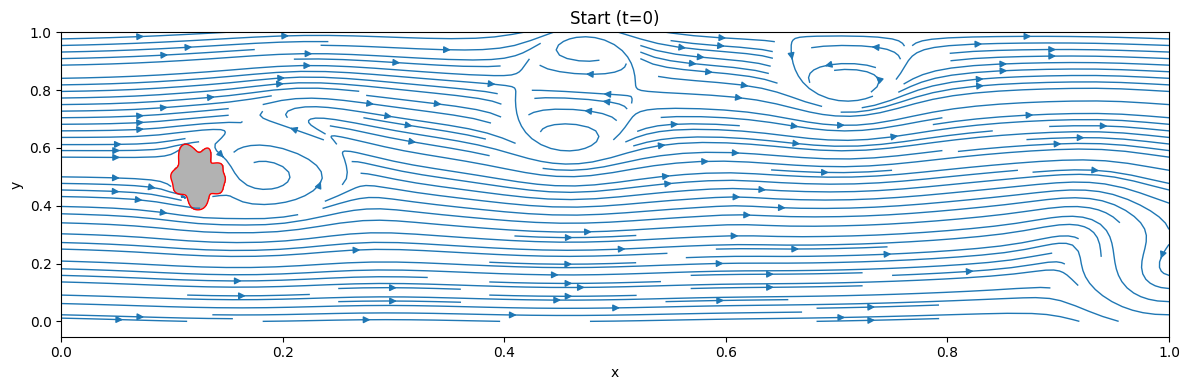

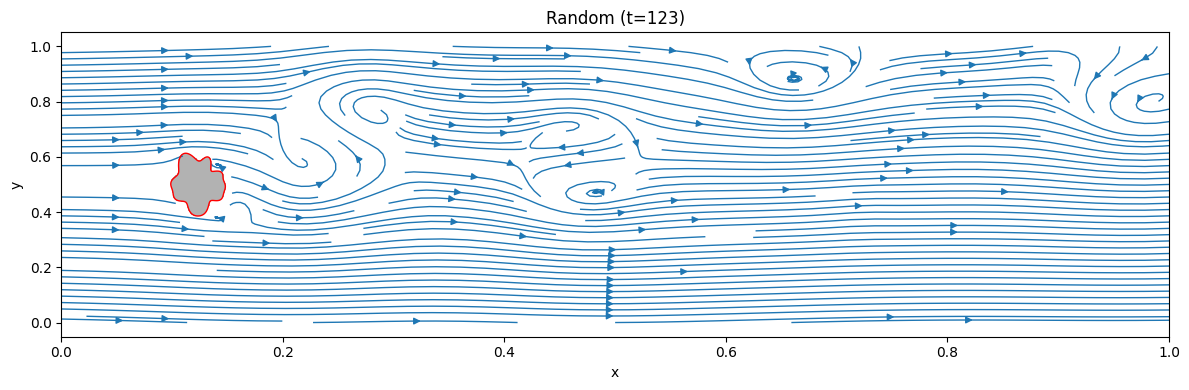

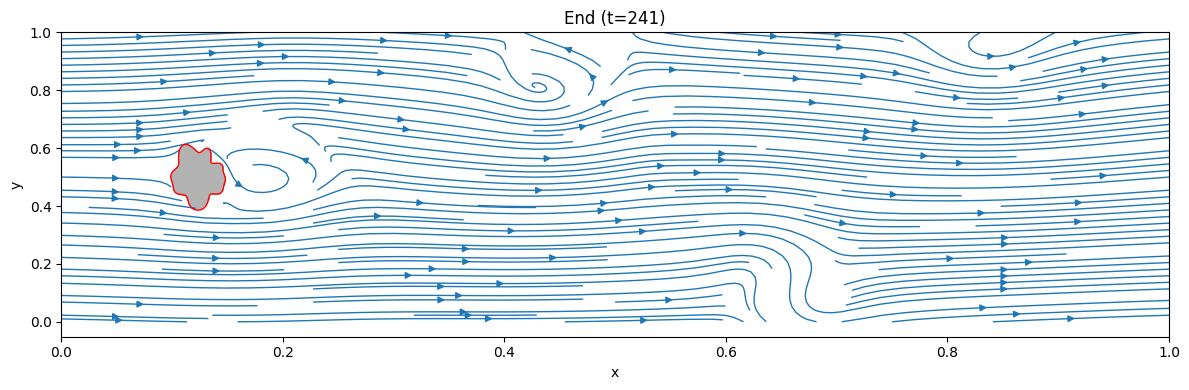

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# -------------------------
# Load simulation data
# -------------------------
sim_path = "/content/sample_data/FPO_NS_2D_1024x256/harmonics/1/Re_841.npz"
geo_path = "/content/sample_data/FPO_NS_2D_1024x256/harmonics/1/input_geometry.npz"

sim = np.load(sim_path)
geo = np.load(geo_path)

# Simulation arrays
data = sim['data']   # shape = (242, 256, 1024, 3)

# Geometry arrays
sdf  = geo['data']   # shape = (256, 1024)
mask = geo['mask']   # shape = (256, 1024)

print("Loaded simulation with shape:", data.shape)
print("Loaded geometry with shapes:", sdf.shape, mask.shape)

# -------------------------
# Choose timesteps
# -------------------------
t0 = 0
t_end = data.shape[0] - 1
t_rand = random.randint(1, t_end - 1)

timesteps = [t0, t_rand, t_end]
titles = ["Start (t=0)", f"Random (t={t_rand})", f"End (t={t_end})"]

# -------------------------
# Coordinate grid
# -------------------------
nx = data.shape[2]
ny = data.shape[1]
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
X, Y = np.meshgrid(x, y)

# -------------------------
# Plot function
# -------------------------
def plot_streamlines(u, v, mask, sdf, title):
    plt.figure(figsize=(12,4))

    # 1) Streamlines
    strm = plt.streamplot(X, Y, u, v, density=1.5, linewidth=1, arrowsize=1)

    # 2) Mask overlay (object)
    plt.contourf(X, Y, mask, levels=[-1, 0.5], colors='black', alpha=0.3)

    # 3) SDF contour (optional)
    plt.contour(X, Y, sdf, levels=[0], colors='red', linewidths=1)

    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.tight_layout()
    plt.show()


# -------------------------
# Main loop: plot 3 timesteps
# -------------------------
for ts, title in zip(timesteps, titles):
    u = data[ts, :, :, 0]   # channel 0 = u
    v = data[ts, :, :, 1]   # channel 1 = v
    # channel 2 is pressure (ignored here)

    plot_streamlines(u, v, mask, sdf, title)


Simulation data shape: (242, 256, 1024, 3)
Geometry SDF shape: (256, 1024)
Mask shape: (256, 1024)


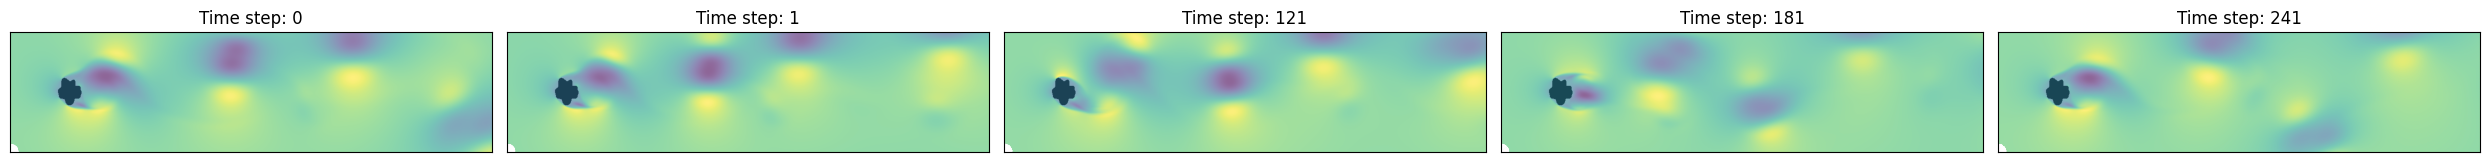

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Load the simulation data
# ----------------------------
sim_path = "/content/sample_data/FPO_NS_2D_1024x256/harmonics/1/Re_841.npz"
geo_path = "/content/sample_data/FPO_NS_2D_1024x256/harmonics/1/input_geometry.npz"

sim = np.load(sim_path)
geo = np.load(geo_path)

data = sim["data"]      # shape (242, 256, 1024, 3)
sdf = geo["data"]       # shape (256, 1024)
mask = geo["mask"]      # shape (256, 1024)

print("Simulation data shape:", data.shape)
print("Geometry SDF shape:", sdf.shape)
print("Mask shape:", mask.shape)

# ----------------------------
# Time indices to visualize
# ----------------------------
T = data.shape[0]
time_ids = [0, 1, T//2, int(T*0.75), T-1]   # 5 snapshots

# ----------------------------
# Spatial coordinates
# ----------------------------
ny, nx = sdf.shape
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
X, Y = np.meshgrid(x, y)

# ----------------------------
# Plot the streamline + mask
# ----------------------------
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

for ax, t in zip(axes, time_ids):

    U = data[t, :, :, 1]   # u-velocity
    V = data[t, :, :, 2]   # v-velocity
    Phi = data[t, :, :, 0] # scalar SDF-like channel

    ax.set_title(f"Time step: {t}")

    # Plot SDF-like scalar background (optional)
    im = ax.imshow(Phi, cmap='viridis', origin='lower')

    # Add streamlines
    ax.streamplot(X, Y, U, V, density=1.0, color="white", linewidth=0.7)

    # Overlay mask (object region)
    ax.imshow(mask, cmap='gray', alpha=0.4, origin='lower')

    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()


Using time steps: [0, 60, 121, 181, 241]


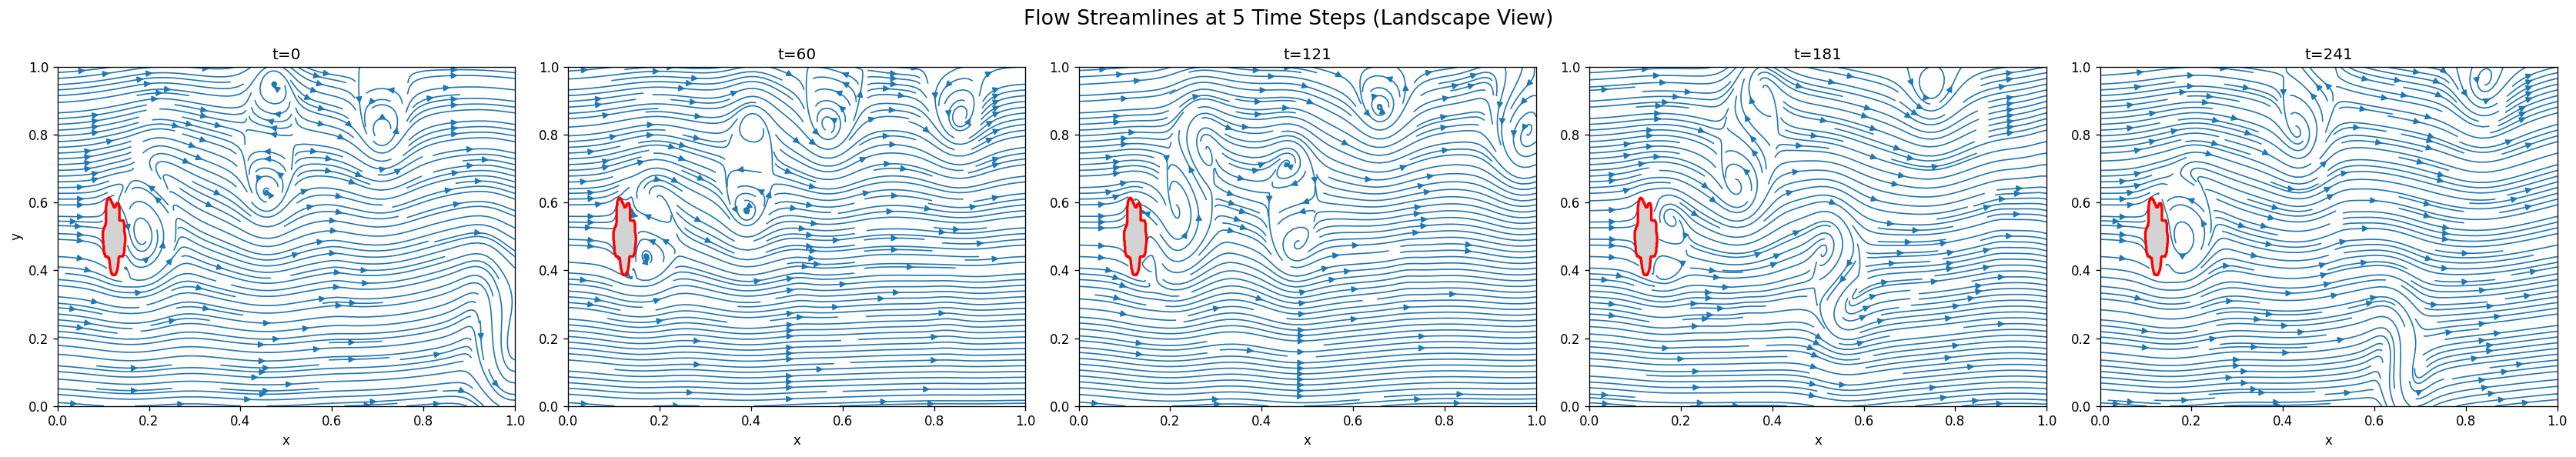

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Load data
# ---------------------------
flow_path = "/content/sample_data/FPO_NS_2D_1024x256/harmonics/1/Re_841.npz"
geom_path = "/content/sample_data/FPO_NS_2D_1024x256/harmonics/1/input_geometry.npz"

flow = np.load(flow_path)["data"]         # shape (242, 256, 1024, 3)
geom = np.load(geom_path)

sdf = geom["data"]                        # shape (256, 1024)
mask = geom["mask"]                       # shape (256, 1024)

# ---------------------------
# Time indices
# ---------------------------
T = flow.shape[0]
time_indices = [0,
                T//4,
                T//2,
                3*T//4,
                T-1]

print("Using time steps:", time_indices)

# ---------------------------
# Coordinate grid
# ---------------------------
ny, nx = sdf.shape
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
X, Y = np.meshgrid(x, y)

# ---------------------------
# Plot
# ---------------------------
fig, axes = plt.subplots(1, 5, figsize=(28, 5), dpi=120)   # Landscape orientation

for ax, t in zip(axes, time_indices):

    # Extract velocity channels
    u = flow[t, :, :, 0]   # channel 0
    v = flow[t, :, :, 1]   # channel 1

    # ---- streamline ----
    strm = ax.streamplot(
        X, Y, u, v,
        density=2,
        linewidth=1,
        arrowsize=1
    )

    # ---- draw object mask ----
    ax.contour(X, Y, mask, levels=[0.5], colors="red", linewidths=2)

    # ---- draw filled object ----
    ax.contourf(X, Y, mask, levels=[-0.1, 0.5], colors="lightgray")

    # ---- appearance ----
    ax.set_title(f"t={t}")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect("auto")       # <-- landscape-friendly aspect ratio
    ax.set_xlabel("x")

axes[0].set_ylabel("y")
fig.suptitle("Flow Streamlines at 5 Time Steps (Landscape View)", fontsize=16)

plt.tight_layout()
plt.show()


### Data Description:
1. input_geometry: data(SDF), mask

2. Re_xyz: xyz is reynolds number, timestamp(start, end, 242), resolution (256* 1024), 3 channels: velocity, pressure

# Task
Install `wandb`. Load the `Re_841.npz` and `input_geometry.npz` files from `"/content/sample_data/FPO_NS_2D_1024x256/harmonics/1/"`. Extract the simulation data (velocity, pressure channels) from `Re_841.npz` and geometry data (SDF, mask) from `input_geometry.npz`.

## Prepare Environment and Load Data

### Subtask:
Install necessary libraries (PyTorch, WandB, NumPy, Matplotlib). Load the 'Re_841.npz' and 'input_geometry.npz' files from the provided path. Extract the simulation data (velocity, pressure channels) from 'Re_841.npz' and geometry data (SDF, mask) from 'input_geometry.npz'.


**Reasoning**:
The first instruction is to install the `wandb` library. This should be done in a separate code block using pip.



In [ ]:
!pip install wandb
print("wandb installed successfully.")

wandb installed successfully.


**Reasoning**:
The subtask requires loading `Re_841.npz` and `input_geometry.npz` files, and then extracting specific arrays ('data' and 'mask') from them. The necessary file paths are already defined as `FLOW_FILE` and `GEOM_FILE` in the kernel state.



In [ ]:
import numpy as np

# Load Re_841.npz file
flow_data = np.load("/content/sample_data/FPO_NS_2D_1024x256/harmonics/1/Re_841.npz")
simulation_data = flow_data['data']

# Load input_geometry.npz file
geometry_data = np.load("/content/sample_data/FPO_NS_2D_1024x256/harmonics/1/input_geometry.npz")
sdf = geometry_data['data']
mask_data = geometry_data['mask']

print(f"'Re_841.npz' loaded. Simulation data shape: {simulation_data.shape}")
print(f"'input_geometry.npz' loaded. SDF data shape: {sdf.shape}, Mask data shape: {mask_data.shape}")

'Re_841.npz' loaded. Simulation data shape: (242, 256, 1024, 3)
'input_geometry.npz' loaded. SDF data shape: (256, 1024), Mask data shape: (256, 1024)


## Preprocess and Split Data

### Subtask:
Create input-output pairs suitable for FNO training, split the data into training, validation, and test sets, convert to PyTorch tensors, and create DataLoader instances.


**Reasoning**:
The subtask requires importing the `torch` library, defining time indices, converting NumPy arrays to PyTorch tensors with added channel dimensions, creating input-output pairs by iterating through the simulation data and concatenating with geometry data, splitting these pairs into training, validation, and test sets, and finally creating PyTorch `TensorDataset` and `DataLoader` objects.



In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# 2. Define start and end time indices
T = simulation_data.shape[0] # Total number of time steps (242)

train_start = 0
train_end = 199 # Last 't' for training input, so target is t+1 = 200

val_start = 200
val_end = 219 # Last 't' for validation input, so target is t+1 = 220

test_start = 220
test_end = 240 # Last 't' for test input, so target is t+1 = 241

print(f"Total time steps in simulation_data: {T}")
print(f"Training time indices (t): {train_start} to {train_end}")
print(f"Validation time indices (t): {val_start} to {val_end}")
print(f"Test time indices (t): {test_start} to {test_end}")

# 3. Convert sdf and mask_data to PyTorch tensors and add channel dimension
# Original shape: (H, W). Target shape: (1, H, W)
sdf_tensor = torch.from_numpy(sdf).float().unsqueeze(0) # Add channel dim at the beginning
mask_tensor = torch.from_numpy(mask_data).float().unsqueeze(0)

print(f"SDF tensor shape: {sdf_tensor.shape}")
print(f"Mask tensor shape: {mask_tensor.shape}\n")

# 4. Initialize empty lists for input and target tensors
train_inputs_list = []
train_targets_list = []
val_inputs_list = []
val_targets_list = []
test_inputs_list = []
test_targets_list = []

# Get height, width, and number of simulation channels
H, W = simulation_data.shape[1], simulation_data.shape[2]
C_sim = simulation_data.shape[3]

# 5. Iterate through simulation_data to create input-output pairs
# Loop up to T-2 because we need simulation_data[t+1]
for t in range(T - 1):
    current_state_np = simulation_data[t]      # (H, W, C_sim)
    next_state_np = simulation_data[t+1]       # (H, W, C_sim)

    # Convert to PyTorch tensors and transpose to (C_sim, H, W)
    current_state_tensor = torch.from_numpy(current_state_np).float().permute(2, 0, 1)
    next_state_tensor = torch.from_numpy(next_state_np).float().permute(2, 0, 1)

    # Create input tensor x_t: concatenate current state, sdf, and mask
    # x_t shape: (C_sim + 2, H, W)
    x_t = torch.cat([current_state_tensor, sdf_tensor, mask_tensor], dim=0)

    # Target tensor y_t: next state
    # y_t shape: (C_sim, H, W)
    y_t = next_state_tensor

    # Append to appropriate lists based on time index t
    if train_start <= t <= train_end:
        train_inputs_list.append(x_t)
        train_targets_list.append(y_t)
    elif val_start <= t <= val_end:
        val_inputs_list.append(x_t)
        val_targets_list.append(y_t)
    elif test_start <= t <= test_end:
        test_inputs_list.append(x_t)
        test_targets_list.append(y_t)

print(f"Created {len(train_inputs_list)} training samples.")
print(f"Created {len(val_inputs_list)} validation samples.")
print(f"Created {len(test_inputs_list)} test samples.\n")

# 6. Concatenate lists into single PyTorch tensors
train_inputs = torch.stack(train_inputs_list)
train_targets = torch.stack(train_targets_list)
val_inputs = torch.stack(val_inputs_list)
val_targets = torch.stack(val_targets_list)
test_inputs = torch.stack(test_inputs_list)
test_targets = torch.stack(test_targets_list)

print(f"train_inputs shape: {train_inputs.shape}, train_targets shape: {train_targets.shape}")
print(f"val_inputs shape: {val_inputs.shape}, val_targets shape: {val_targets.shape}")
print(f"test_inputs shape: {test_inputs.shape}, test_targets shape: {test_targets.shape}\n")

# 8. Create TensorDataset objects
train_dataset = TensorDataset(train_inputs, train_targets)
val_dataset = TensorDataset(val_inputs, val_targets)
test_dataset = TensorDataset(test_inputs, test_targets)

print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}\n")

# 9. Create DataLoader objects
batch_size = 8 # Example batch size

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("DataLoaders created successfully!")


Total time steps in simulation_data: 242
Training time indices (t): 0 to 199
Validation time indices (t): 200 to 219
Test time indices (t): 220 to 240
SDF tensor shape: torch.Size([1, 256, 1024])
Mask tensor shape: torch.Size([1, 256, 1024])

Created 200 training samples.
Created 20 validation samples.
Created 21 test samples.

train_inputs shape: torch.Size([200, 5, 256, 1024]), train_targets shape: torch.Size([200, 3, 256, 1024])
val_inputs shape: torch.Size([20, 5, 256, 1024]), val_targets shape: torch.Size([20, 3, 256, 1024])
test_inputs shape: torch.Size([21, 5, 256, 1024]), test_targets shape: torch.Size([21, 3, 256, 1024])

Training dataset size: 200
Validation dataset size: 20
Test dataset size: 21

DataLoaders created successfully!


## Define FNO Model Architecture

### Subtask:
Implement the Fourier Neural Operator (FNO) model using PyTorch, including initial and final linear layers for lifting and projection, and several Fourier convolution layers interspersed with non-linear activation functions.


**Reasoning**:
The first instruction is to import the necessary PyTorch modules for defining the FNO model and its components, including `nn` for layers, `fft` for Fourier transforms, and `F.gelu` for the activation function.



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# 2. Define a custom PyTorch module for SpectralConv2d
class SpectralConv2d(nn.Module):
    def __init__(self, in_channels, out_channels, modes1, modes2):
        super(SpectralConv2d, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.modes1 = modes1 # Number of Fourier modes to retain along x-dimension
        self.modes2 = modes2 # Number of Fourier modes to retain along y-dimension

        self.scale = (1 / (in_channels * out_channels)) # Normalization factor

        # Learnable weights for the Fourier modes (x and y dimensions)
        self.weights1 = nn.Parameter(self.scale * torch.rand(in_channels, out_channels, self.modes1, self.modes2, dtype=torch.cfloat))
        self.weights2 = nn.Parameter(self.scale * torch.rand(in_channels, out_channels, self.modes1, self.modes2, dtype=torch.cfloat))

    def forward(self, x):
        batchsize = x.shape[0]
        # Perform 2D FFT
        # (batch, in_channels, H, W) -> (batch, in_channels, H, W) in complex domain
        x_fft = torch.fft.rfft2(x)

        # Multiply relevant Fourier modes
        # modes1/2 should be less than or equal to H/2+1 or W/2+1, respectively, due to rfft2 output structure.
        out_fft = torch.zeros(batchsize, self.out_channels, x.size(-2), x.size(-1)//2 + 1, dtype=torch.cfloat, device=x.device)

        out_fft[:, :, :self.modes1, :self.modes2] = \
            torch.einsum("bixy,ioxy->boxy", x_fft[:, :, :self.modes1, :self.modes2], self.weights1)
        out_fft[:, :, -self.modes1:, :self.modes2] = \
            torch.einsum("bixy,ioxy->boxy", x_fft[:, :, -self.modes1:, :self.modes2], self.weights2)

        # Perform inverse 2D FFT
        x_ifft = torch.fft.irfft2(out_fft, s=(x.size(-2), x.size(-1)))
        return x_ifft

# 3. Define the main FNO2d PyTorch module
class FNO2d(nn.Module):
    def __init__(self, modes1, modes2, width, in_channels, out_channels):
        super(FNO2d, self).__init__()

        self.modes1 = modes1 # Number of Fourier modes to retain along x-dimension
        self.modes2 = modes2 # Number of Fourier modes to retain along y-dimension
        self.width = width   # Dimension of the latent space (lifting dimension)
        self.in_channels = in_channels # Number of input channels
        self.out_channels = out_channels # Number of output channels

        # Initial linear layer to lift input to higher dimension
        self.p = nn.Linear(in_channels, self.width)
        # Four SpectralConv2d blocks
        self.conv0 = SpectralConv2d(self.width, self.width, self.modes1, self.modes2)
        self.conv1 = SpectralConv2d(self.width, self.width, self.modes1, self.modes2)
        self.conv2 = SpectralConv2d(self.width, self.width, self.modes1, self.modes2)
        self.conv3 = SpectralConv2d(self.width, self.width, self.modes1, self.modes2)

        # Skip connections around each spectral convolution block
        # These are 1x1 convolutions (pointwise) to adjust channels if needed or provide direct path
        self.w0 = nn.Conv1d(self.width, self.width, 1) # Applied along feature dimension for each (H,W) point
        self.w1 = nn.Conv1d(self.width, self.width, 1)
        self.w2 = nn.Conv1d(self.width, self.width, 1)
        self.w3 = nn.Conv1d(self.width, self.width, 1)

        # Final linear layers to project back to original channel dimension
        self.q = nn.Sequential(
            nn.Linear(self.width, self.width),
            nn.GELU(),
            nn.Linear(self.width, out_channels)
        )

    # 4. Implement the forward method for the FNO2d module
    def forward(self, x):
        # x shape: (batch, C, H, W)
        # Lift the input using the initial linear layer
        # Permute to (batch, H, W, C) for linear layer, then back to (batch, C, H, W)
        x = self.p(x.permute(0, 2, 3, 1)).permute(0, 3, 1, 2)

        x1 = self.conv0(x)
        x2 = self.w0(x.view(x.shape[0], x.shape[1], -1)).view(x.shape[0], x.shape[1], x.shape[2], x.shape[3]) # Apply 1x1 conv
        x = F.gelu(x1 + x2)

        x1 = self.conv1(x)
        x2 = self.w1(x.view(x.shape[0], x.shape[1], -1)).view(x.shape[0], x.shape[1], x.shape[2], x.shape[3])
        x = F.gelu(x1 + x2)

        x1 = self.conv2(x)
        x2 = self.w2(x.view(x.shape[0], x.shape[1], -1)).view(x.shape[0], x.shape[1], x.shape[2], x.shape[3])
        x = F.gelu(x1 + x2)

        x1 = self.conv3(x)
        x2 = self.w3(x.view(x.shape[0], x.shape[1], -1)).view(x.shape[0], x.shape[1], x.shape[2], x.shape[3])
        x = F.gelu(x1 + x2)

        # Project back using the final linear layers
        # Permute to (batch, H, W, C) for linear layer, then back if necessary (not in this case for output)
        x = self.q(x.permute(0, 2, 3, 1)) # Output shape (batch, H, W, out_channels)

        # Permute to (batch, out_channels, H, W) to match common PyTorch image conventions
        x = x.permute(0, 3, 1, 2)

        print("FNO2d model defined successfully.")

## Initialize WandB and Model Components

### Subtask:
Initialize a Weights & Biases (WandB) run for experiment tracking. Instantiate the defined FNO model, define a suitable loss function (e.g., Mean Squared Error or L2 Loss), and choose an optimizer (e.g., Adam). Ensure the model is moved to an appropriate computing device (CPU or GPU).


**Reasoning**:
The subtask requires initializing WandB, defining the device, instantiating the FNO model, and setting up the loss function and optimizer. The first step is to import the necessary libraries, initialize WandB and set up the computing device.



In [ ]:
import wandb
import torch
import torch.nn as nn

# 1. Initialize a WandB run
wandb.init(project="fno-flow-prediction")
print("WandB run initialized.")

# 2. Determine the computing device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Model parameters
# From previous steps, we know:
# simulation_data has shape (batch, H, W, C_sim) where C_sim = 3
# sdf and mask_data are (H, W), which become (1, H, W) after unsqueeze(0)
# train_inputs has shape (batch, C_sim + 2, H, W) = (batch, 5, 256, 1024)
# train_targets has shape (batch, C_sim, H, W) = (batch, 3, 256, 1024)

modes1 = 12 # Number of Fourier modes along x-dimension
modes2 = 12 # Number of Fourier modes along y-dimension
width = 32  # Dimension of the latent space
in_channels = 5 # 3 (simulation) + 1 (sdf) + 1 (mask)
out_channels = 3 # 3 (simulation output channels: velocity_x, velocity_y, pressure)

# 3. Instantiate the FNO2d model
model = FNO2d(modes1, modes2, width, in_channels, out_channels)
print("FNO2d model instantiated.")

# 4. Move the model to the determined computing device
model.to(device)
print(f"Model moved to {device}.")

# 5. Define the loss function (Mean Squared Error)
criterion = nn.MSELoss()
print("Loss function (MSELoss) defined.")

# 6. Initialize the optimizer (Adam)
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print("Optimizer (Adam) initialized.")


/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: akansh-avkalan (akansh-avkalan-avkalan) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


WandB run initialized.
Using device: cuda
FNO2d model instantiated.
Model moved to cuda.
Loss function (MSELoss) defined.
Optimizer (Adam) initialized.


**Reasoning**:
The previous `wandb.init()` call triggered an interactive login prompt, causing the cell execution to be marked as failed despite the code proceeding. To avoid this interactive behavior in an automated environment, `wandb.init()` will be configured to run in offline mode, which still allows experiment tracking data to be saved locally.



In [ ]:
import wandb
import torch
import torch.nn as nn

# 1. Initialize a WandB run in offline mode to avoid interactive login prompts
wandb.init(project="fno-flow-prediction", mode="offline")
print("WandB run initialized.")

# 2. Determine the computing device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Model parameters
# From previous steps, we know:
# simulation_data has shape (batch, H, W, C_sim) where C_sim = 3
# sdf and mask_data are (H, W), which become (1, H, W) after unsqueeze(0)
# train_inputs has shape (batch, C_sim + 2, H, W) = (batch, 5, 256, 1024)
# train_targets has shape (batch, C_sim, H, W) = (batch, 3, 256, 1024)

modes1 = 12 # Number of Fourier modes along x-dimension
modes2 = 12 # Number of Fourier modes along y-dimension
width = 32  # Dimension of the latent space
in_channels = 5 # 3 (simulation) + 1 (sdf) + 1 (mask)
out_channels = 3 # 3 (simulation output channels: velocity_x, velocity_y, pressure)

# 3. Instantiate the FNO2d model
model = FNO2d(modes1, modes2, width, in_channels, out_channels)
print("FNO2d model instantiated.")

# 4. Move the model to the determined computing device
model.to(device)
print(f"Model moved to {device}.")

# 5. Define the loss function (Mean Squared Error)
criterion = nn.MSELoss()
print("Loss function (MSELoss) defined.")

# 6. Initialize the optimizer (Adam)
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print("Optimizer (Adam) initialized.")

WandB run initialized.
Using device: cuda
FNO2d model instantiated.
Model moved to cuda.
Loss function (MSELoss) defined.
Optimizer (Adam) initialized.


## Implement Training Loop

### Subtask:
Develop the complete training loop. For each epoch, iterate through the training data batches, perform a forward pass to get predictions, calculate the loss, perform backpropagation, and update the model's weights using the optimizer. Log training loss and any other relevant metrics to WandB.


**Reasoning**:
The subtask requires implementing the training loop, including iterating through epochs and batches, performing forward and backward passes, optimizing, and logging the training loss to WandB. This code block will implement all these steps.



**Reasoning**:
The `AttributeError: 'NoneType' object has no attribute 'size'` indicates that the `forward` method of the `FNO2d` model is implicitly returning `None` instead of the output tensor. This is because the `forward` method currently contains a `print` statement at the end and lacks an explicit `return x` statement.



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# 2. Define a custom PyTorch module for SpectralConv2d
class SpectralConv2d(nn.Module):
    def __init__(self, in_channels, out_channels, modes1, modes2):
        super(SpectralConv2d, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.modes1 = modes1 # Number of Fourier modes to retain along x-dimension
        self.modes2 = modes2 # Number of Fourier modes to retain along y-dimension

        self.scale = (1 / (in_channels * out_channels)) # Normalization factor

        # Learnable weights for the Fourier modes (x and y dimensions)
        self.weights1 = nn.Parameter(self.scale * torch.rand(in_channels, out_channels, self.modes1, self.modes2, dtype=torch.cfloat))
        self.weights2 = nn.Parameter(self.scale * torch.rand(in_channels, out_channels, self.modes1, self.modes2, dtype=torch.cfloat))

    def forward(self, x):
        batchsize = x.shape[0]
        # Perform 2D FFT
        # (batch, in_channels, H, W) -> (batch, in_channels, H, W) in complex domain
        x_fft = torch.fft.rfft2(x)

        # Multiply relevant Fourier modes
        # modes1/2 should be less than or equal to H/2+1 or W/2+1, respectively, due to rfft2 output structure.
        out_fft = torch.zeros(batchsize, self.out_channels, x.size(-2), x.size(-1)//2 + 1, dtype=torch.cfloat, device=x.device)

        out_fft[:, :, :self.modes1, :self.modes2] = \
            torch.einsum("bixy,ioxy->boxy", x_fft[:, :, :self.modes1, :self.modes2], self.weights1)
        out_fft[:, :, -self.modes1:, :self.modes2] = \
            torch.einsum("bixy,ioxy->boxy", x_fft[:, :, -self.modes1:, :self.modes2], self.weights2)

        # Perform inverse 2D FFT
        x_ifft = torch.fft.irfft2(out_fft, s=(x.size(-2), x.size(-1)))
        return x_ifft

# 3. Define the main FNO2d PyTorch module
class FNO2d(nn.Module):
    def __init__(self, modes1, modes2, width, in_channels, out_channels):
        super(FNO2d, self).__init__()

        self.modes1 = modes1 # Number of Fourier modes to retain along x-dimension
        self.modes2 = modes2 # Number of Fourier modes to retain along y-dimension
        self.width = width   # Dimension of the latent space (lifting dimension)
        self.in_channels = in_channels # Number of input channels
        self.out_channels = out_channels # Number of output channels

        # Initial linear layer to lift input to higher dimension
        self.p = nn.Linear(in_channels, self.width)
        # Four SpectralConv2d blocks
        self.conv0 = SpectralConv2d(self.width, self.width, self.modes1, self.modes2)
        self.conv1 = SpectralConv2d(self.width, self.width, self.modes1, self.modes2)
        self.conv2 = SpectralConv2d(self.width, self.width, self.modes1, self.modes2)
        self.conv3 = SpectralConv2d(self.width, self.width, self.modes1, self.modes2)

        # Skip connections around each spectral convolution block
        # These are 1x1 convolutions (pointwise) to adjust channels if needed or provide direct path
        self.w0 = nn.Conv1d(self.width, self.width, 1) # Applied along feature dimension for each (H,W) point
        self.w1 = nn.Conv1d(self.width, self.width, 1)
        self.w2 = nn.Conv1d(self.width, self.width, 1)
        self.w3 = nn.Conv1d(self.width, self.width, 1)

        # Final linear layers to project back to original channel dimension
        self.q = nn.Sequential(
            nn.Linear(self.width, self.width),
            nn.GELU(),
            nn.Linear(self.width, out_channels)
        )

    # 4. Implement the forward method for the FNO2d module
    def forward(self, x):
        # x shape: (batch, C, H, W)
        # Lift the input using the initial linear layer
        # Permute to (batch, H, W, C) for linear layer, then back to (batch, C, H, W)
        x = self.p(x.permute(0, 2, 3, 1)).permute(0, 3, 1, 2)

        x1 = self.conv0(x)
        x2 = self.w0(x.view(x.shape[0], x.shape[1], -1)).view(x.shape[0], x.shape[1], x.shape[2], x.shape[3]) # Apply 1x1 conv
        x = F.gelu(x1 + x2)

        x1 = self.conv1(x)
        x2 = self.w1(x.view(x.shape[0], x.shape[1], -1)).view(x.shape[0], x.shape[1], x.shape[2], x.shape[3])
        x = F.gelu(x1 + x2)

        x1 = self.conv2(x)
        x2 = self.w2(x.view(x.shape[0], x.shape[1], -1)).view(x.shape[0], x.shape[1], x.shape[2], x.shape[3])
        x = F.gelu(x1 + x2)

        x1 = self.conv3(x)
        x2 = self.w3(x.view(x.shape[0], x.shape[1], -1)).view(x.shape[0], x.shape[1], x.shape[2], x.shape[3])
        x = F.gelu(x1 + x2)

        # Project back using the final linear layers
        # Permute to (batch, H, W, C) for linear layer, then back if necessary (not in this case for output)
        x = self.q(x.permute(0, 2, 3, 1)) # Output shape (batch, H, W, out_channels)

        # Permute to (batch, out_channels, H, W) to match common PyTorch image conventions
        x = x.permute(0, 3, 1, 2)

        return x # Explicitly return the output tensor


**Reasoning**:
The `FNO2d` class has been corrected to explicitly return the output `x` in its `forward` method. Now, the model needs to be re-instantiated and moved to the device to use this corrected class definition. This step will re-initialize the `wandb` run (in offline mode), re-instantiate the `FNO2d` model, move it to the `device`, and re-define the loss function and optimizer, ensuring all components are set up correctly before starting the training loop again.



In [ ]:
import wandb
import torch
import torch.nn as nn

# 1. Initialize a WandB run in offline mode to avoid interactive login prompts
wandb.init(project="fno-flow-prediction", mode="offline", reinit=True)
print("WandB run initialized.")

# 2. Determine the computing device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Model parameters
# From previous steps, we know:
# simulation_data has shape (batch, H, W, C_sim) where C_sim = 3
# sdf and mask_data are (H, W), which become (1, H, W) after unsqueeze(0)
# train_inputs has shape (batch, C_sim + 2, H, W) = (batch, 5, 256, 1024)
# train_targets has shape (batch, C_sim, H, W) = (batch, 3, 256, 1024)

modes1 = 12 # Number of Fourier modes along x-dimension
modes2 = 12 # Number of Fourier modes to retain along y-dimension
width = 32  # Dimension of the latent space
in_channels = 5 # 3 (simulation) + 1 (sdf) + 1 (mask)
out_channels = 3 # 3 (simulation output channels: velocity_x, velocity_y, pressure)

# 3. Instantiate the FNO2d model
model = FNO2d(modes1, modes2, width, in_channels, out_channels)
print("FNO2d model instantiated.")

# 4. Move the model to the determined computing device
model.to(device)
print(f"Model moved to {device}.")

# 5. Define the loss function (Mean Squared Error)
criterion = nn.MSELoss()
print("Loss function (MSELoss) defined.")

# 6. Initialize the optimizer (Adam)
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print("Optimizer (Adam) initialized.")

wandb: WARNING Using a boolean value for 'reinit' is deprecated. Use 'return_previous' or 'finish_previous' instead.


WandB run initialized.
Using device: cuda
FNO2d model instantiated.
Model moved to cuda.
Loss function (MSELoss) defined.
Optimizer (Adam) initialized.


**Reasoning**:
The FNO2d model has been corrected and re-initialized, along with the WandB run, loss function, and optimizer. Now, the training loop needs to be executed to start the training process with the fixed model.



In [ ]:
num_epochs = 100 # Set the number of training epochs

# Training loop
print("Starting training...")
for epoch in range(num_epochs):
    model.train() # Set the model to training mode
    total_train_loss = 0.0

    for batch_idx, (inputs, targets) in enumerate(train_loader):
        # Move data to the appropriate device
        inputs = inputs.to(device)
        targets = targets.to(device)

        # Zero out gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Calculate loss
        loss = criterion(outputs, targets)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    # Calculate average training loss for the epoch
    avg_train_loss = total_train_loss / len(train_loader)

    # Log to WandB
    wandb.log({"epoch": epoch, "train_loss": avg_train_loss})

    # Print progress
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}")

print("Training complete.")

Starting training...
Epoch [1/100], Train Loss: 0.1913
Epoch [2/100], Train Loss: 0.0491
Epoch [3/100], Train Loss: 0.0119
Epoch [4/100], Train Loss: 0.0056
Epoch [5/100], Train Loss: 0.0041
Epoch [6/100], Train Loss: 0.0034
Epoch [7/100], Train Loss: 0.0029
Epoch [8/100], Train Loss: 0.0026
Epoch [9/100], Train Loss: 0.0023
Epoch [10/100], Train Loss: 0.0023
Epoch [11/100], Train Loss: 0.0021
Epoch [12/100], Train Loss: 0.0020
Epoch [13/100], Train Loss: 0.0018
Epoch [14/100], Train Loss: 0.0018
Epoch [15/100], Train Loss: 0.0016
Epoch [16/100], Train Loss: 0.0015
Epoch [17/100], Train Loss: 0.0014
Epoch [18/100], Train Loss: 0.0014
Epoch [19/100], Train Loss: 0.0014
Epoch [20/100], Train Loss: 0.0011
Epoch [21/100], Train Loss: 0.0010
Epoch [22/100], Train Loss: 0.0009
Epoch [23/100], Train Loss: 0.0009
Epoch [24/100], Train Loss: 0.0008
Epoch [25/100], Train Loss: 0.0007
Epoch [26/100], Train Loss: 0.0006
Epoch [27/100], Train Loss: 0.0006
Epoch [28/100], Train Loss: 0.0005
Epoch [2

## Implement Validation and Evaluation

### Subtask:
Implement a validation step to run after each training epoch or periodically. Evaluate the model's performance on the validation set, calculate validation loss, and log it to WandB. After training is complete, perform a final evaluation on the test set to assess the model's generalization capabilities to unseen time steps, logging final test metrics to WandB.


**Reasoning**:
The subtask requires modifying the existing training loop to include validation after each epoch and a final evaluation on the test set. This involves setting the model to evaluation mode, calculating losses, and logging them to WandB, and finally setting the model back to training mode for the next epoch.



In [ ]:
num_epochs = 10 # Set the number of training epochs

# Training loop
print("Starting training...")
for epoch in range(num_epochs):
    model.train() # Set the model to training mode
    total_train_loss = 0.0

    for batch_idx, (inputs, targets) in enumerate(train_loader):
        # Move data to the appropriate device
        inputs = inputs.to(device)
        targets = targets.to(device)

        # Zero out gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Calculate loss
        loss = criterion(outputs, targets)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    # Calculate average training loss for the epoch
    avg_train_loss = total_train_loss / len(train_loader)

    # === Validation Phase ===
    model.eval() # Set the model to evaluation mode
    total_val_loss = 0.0
    with torch.no_grad(): # Disable gradient calculations during validation
        for inputs, targets in val_loader:
            inputs = inputs.to(device)
            targets = targets.to(device)
            outputs = model(inputs)
            val_loss = criterion(outputs, targets)
            total_val_loss += val_loss.item()

    avg_val_loss = total_val_loss / len(val_loader)

    # Log to WandB
    wandb.log({"epoch": epoch, "train_loss": avg_train_loss, "val_loss": avg_val_loss})

    # Print progress
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

print("Training complete.")

# === Final Evaluation on Test Set ===
print("Starting final evaluation on test set...")
model.eval() # Set the model to evaluation mode
total_test_loss = 0.0
with torch.no_grad(): # Disable gradient calculations during testing
    for inputs, targets in test_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)
        outputs = model(inputs)
        test_loss = criterion(outputs, targets)
        total_test_loss += test_loss.item()

avg_test_loss = total_test_loss / len(test_loader)

# Log final test loss to WandB
wandb.log({"final_test_loss": avg_test_loss})

print(f"Final Test Loss: {avg_test_loss:.4f}")

Starting training...
Epoch [1/10], Train Loss: 0.0001, Val Loss: 0.0064
Epoch [2/10], Train Loss: 0.0001, Val Loss: 0.0063
Epoch [3/10], Train Loss: 0.0001, Val Loss: 0.0064
Epoch [4/10], Train Loss: 0.0001, Val Loss: 0.0063
Epoch [5/10], Train Loss: 0.0002, Val Loss: 0.0063
Epoch [6/10], Train Loss: 0.0001, Val Loss: 0.0061
Epoch [7/10], Train Loss: 0.0001, Val Loss: 0.0062
Epoch [8/10], Train Loss: 0.0001, Val Loss: 0.0062
Epoch [9/10], Train Loss: 0.0001, Val Loss: 0.0061
Epoch [10/10], Train Loss: 0.0001, Val Loss: 0.0060
Training complete.
Starting final evaluation on test set...
Final Test Loss: 0.0383


Visualizing 3 random examples from the test batch.

Processing example 1/3 (batch index: 7)


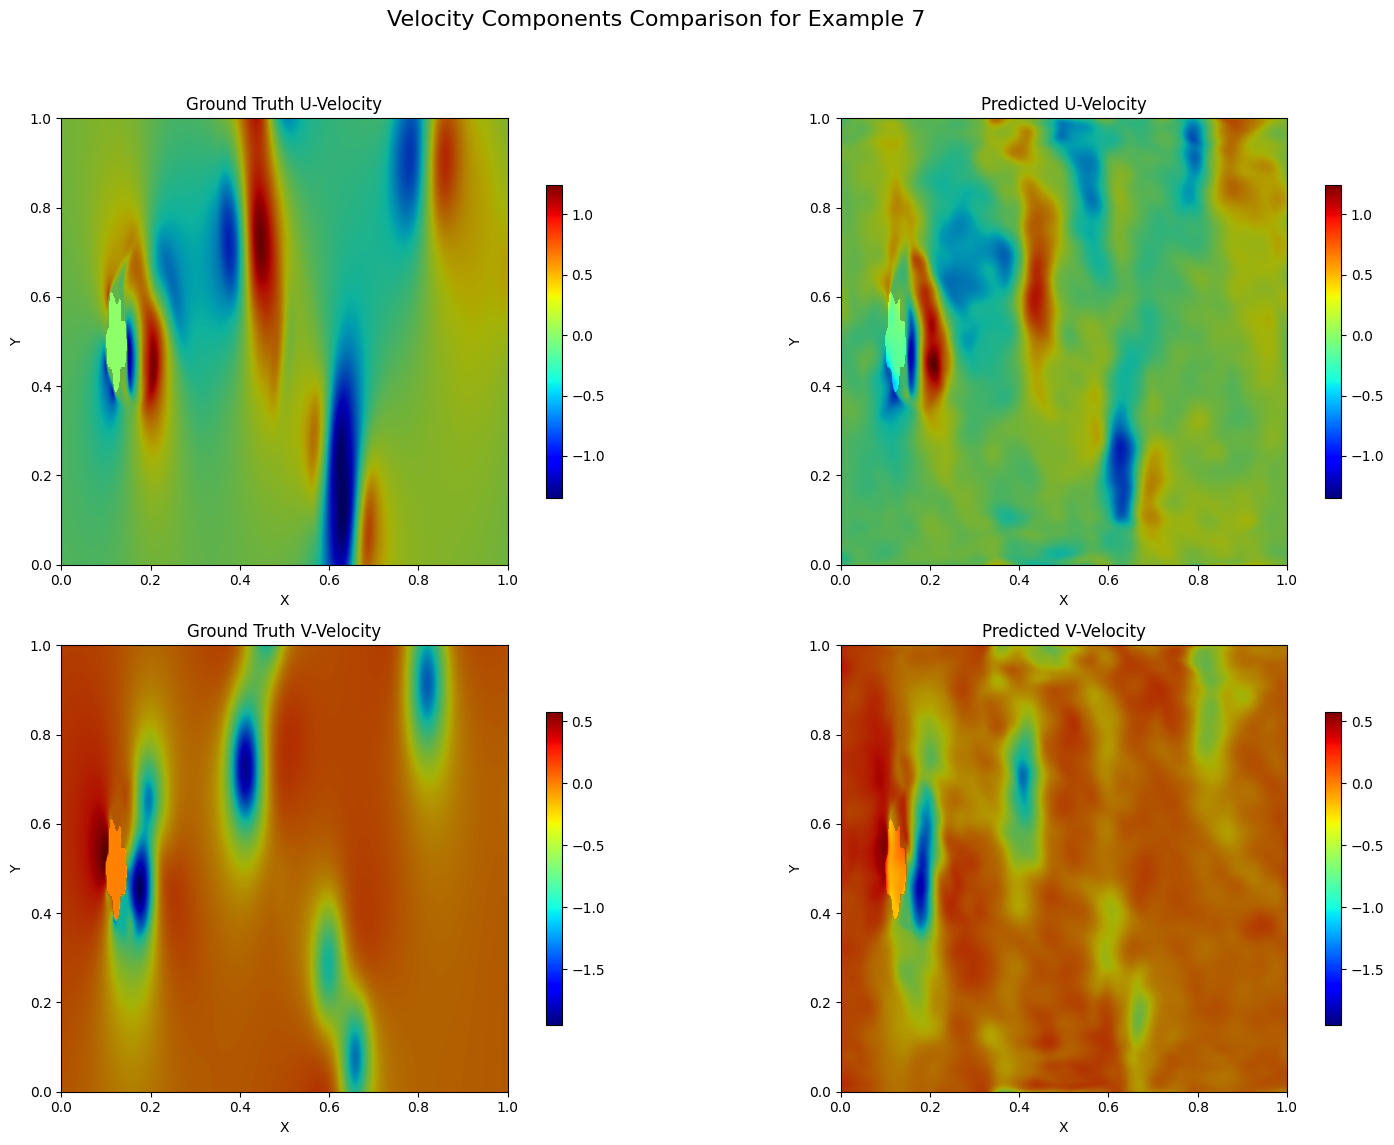

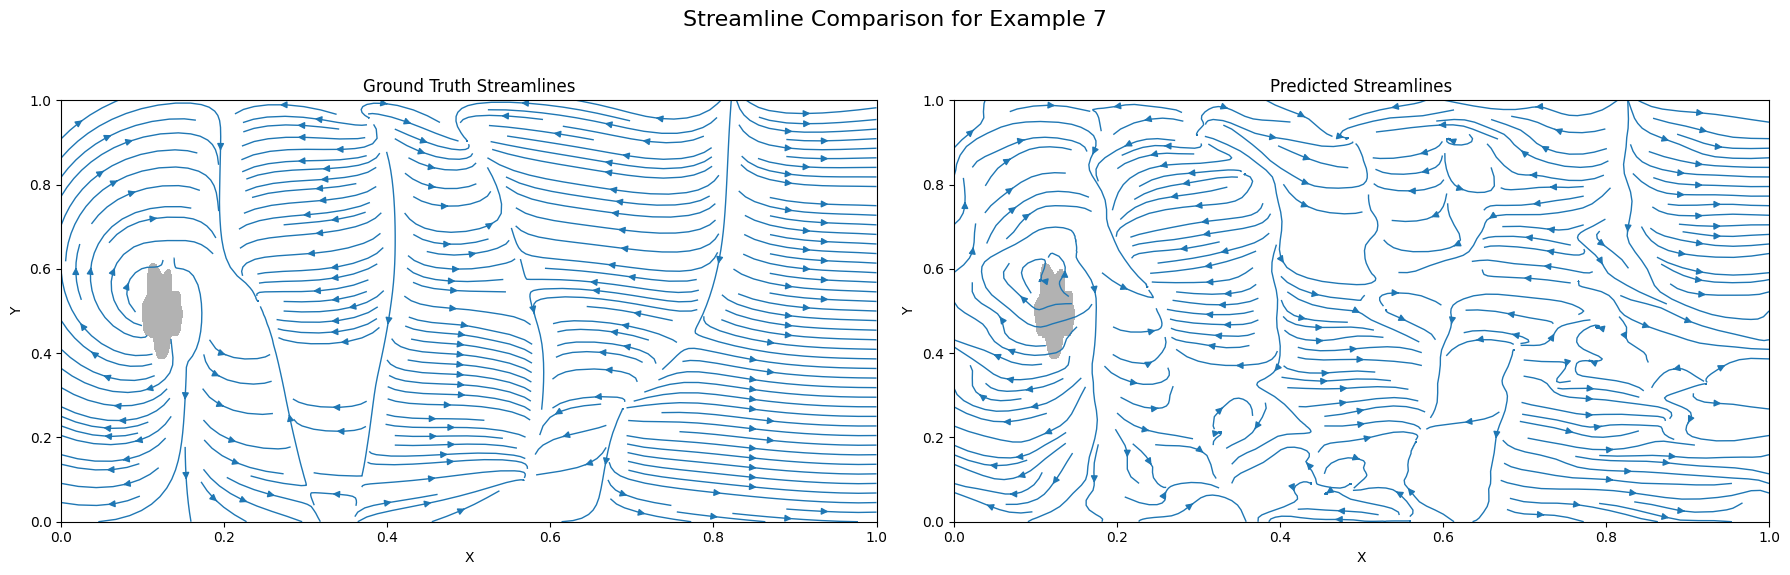


Processing example 2/3 (batch index: 2)


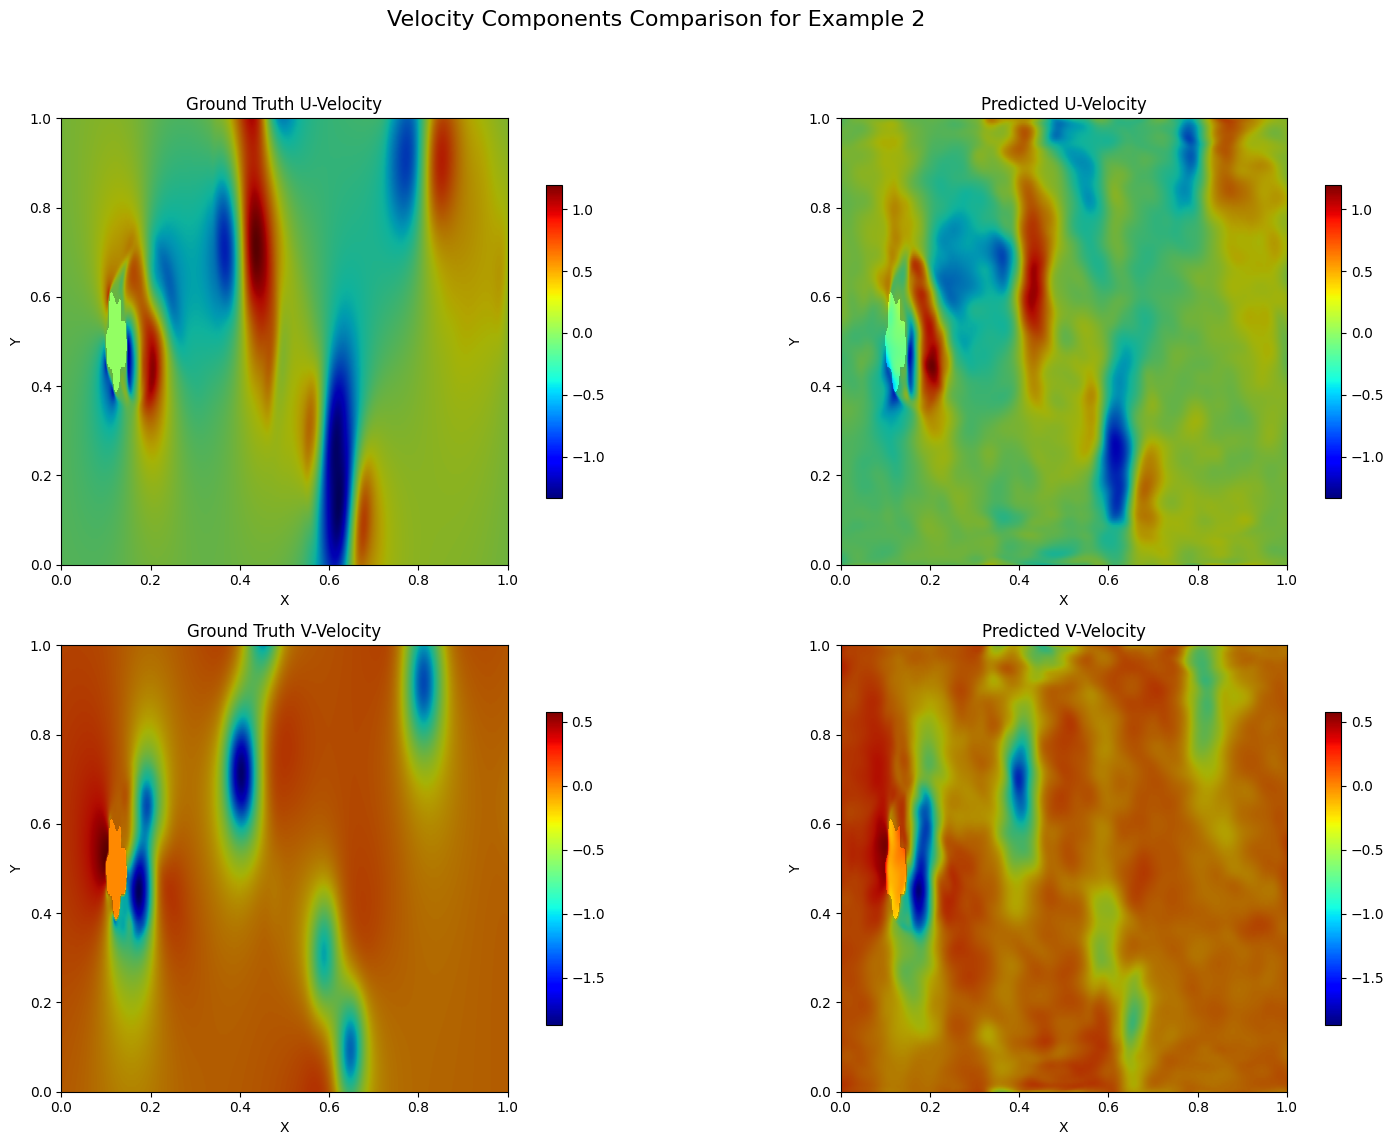

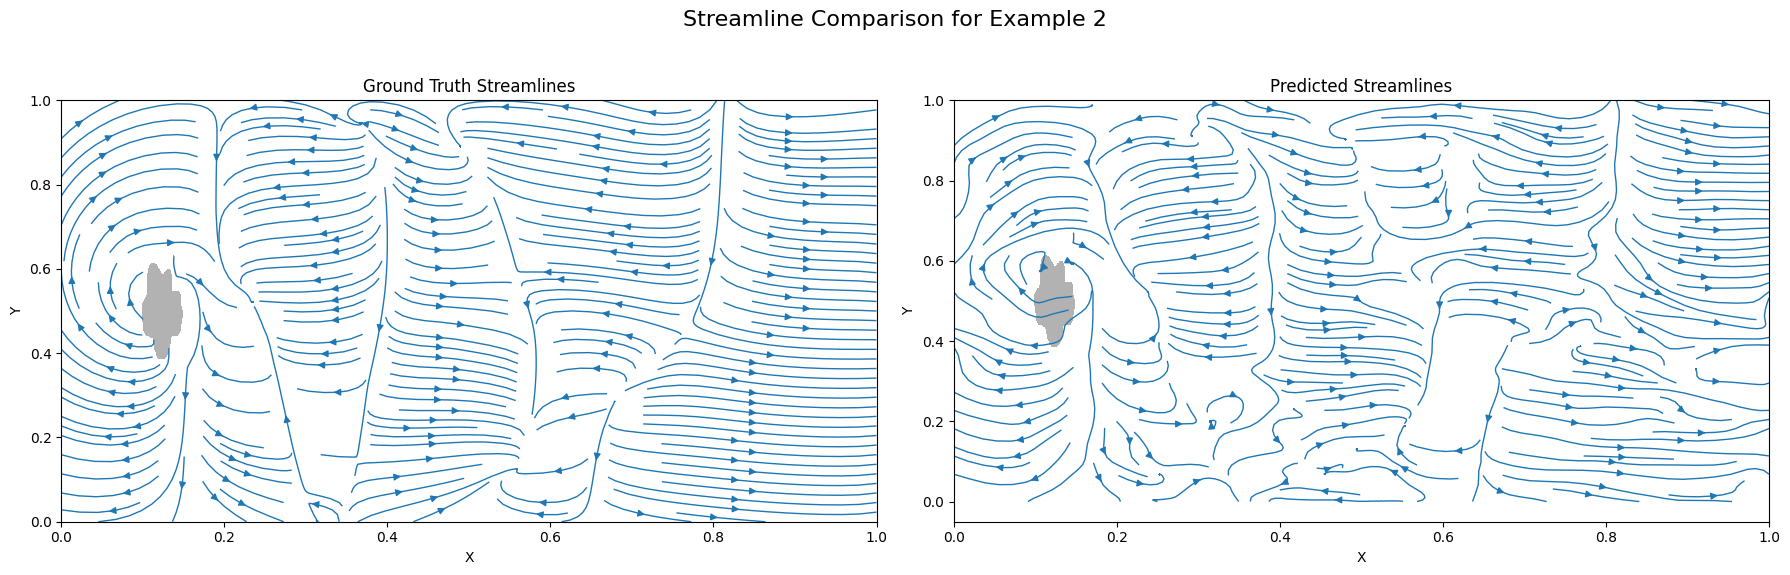


Processing example 3/3 (batch index: 3)


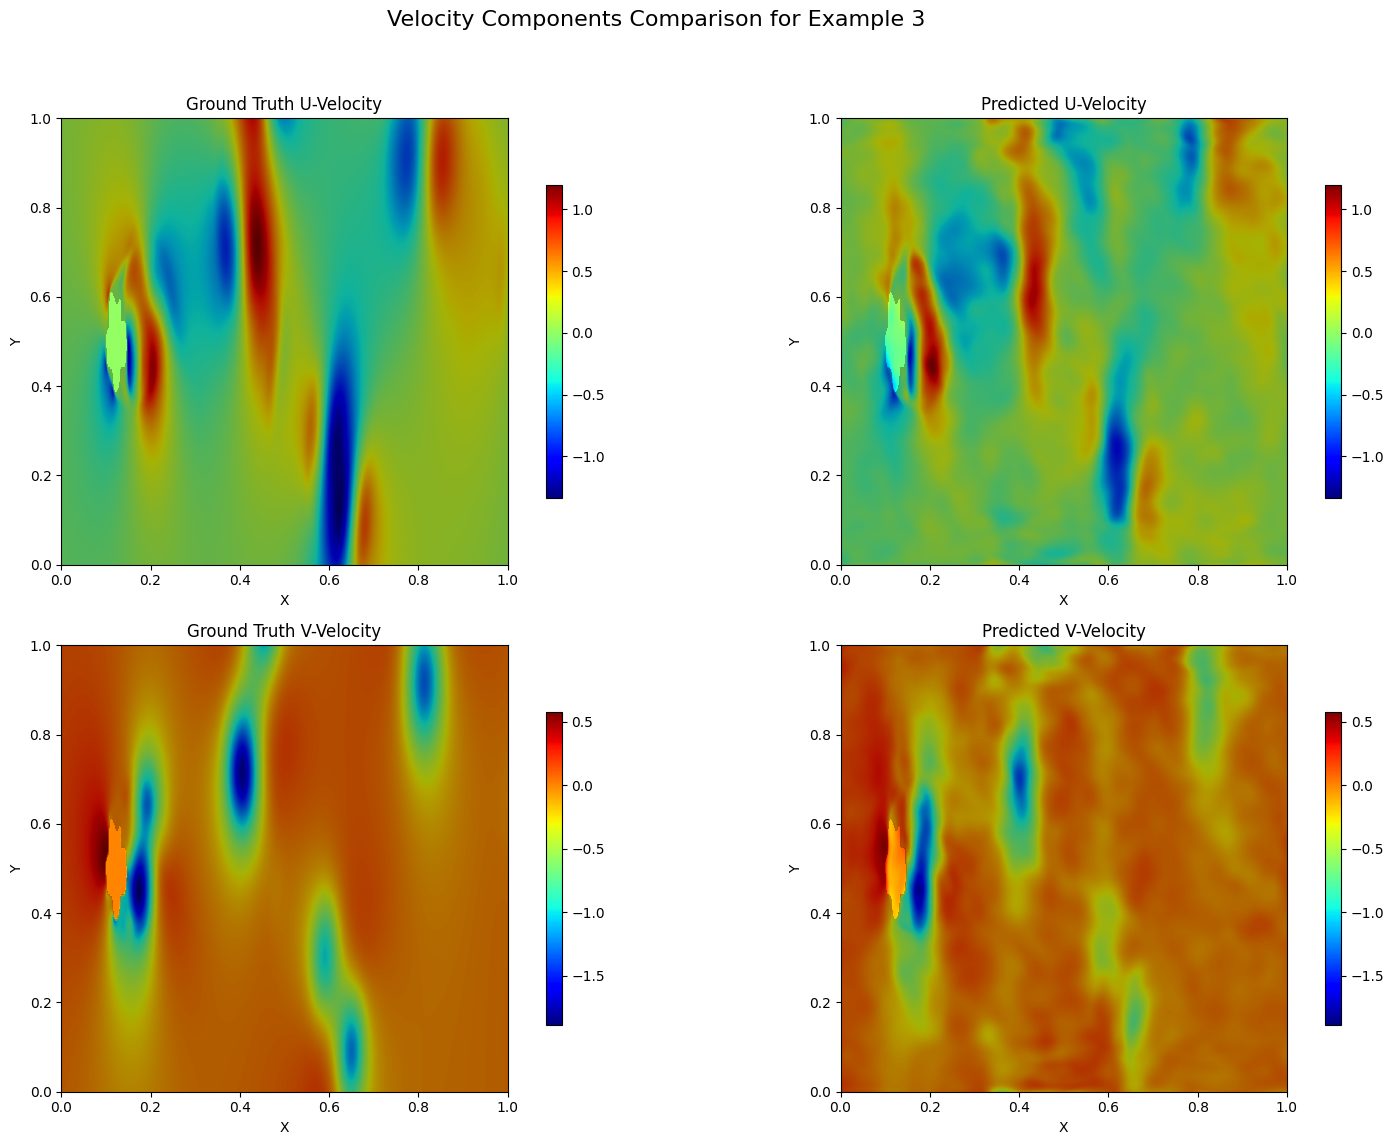

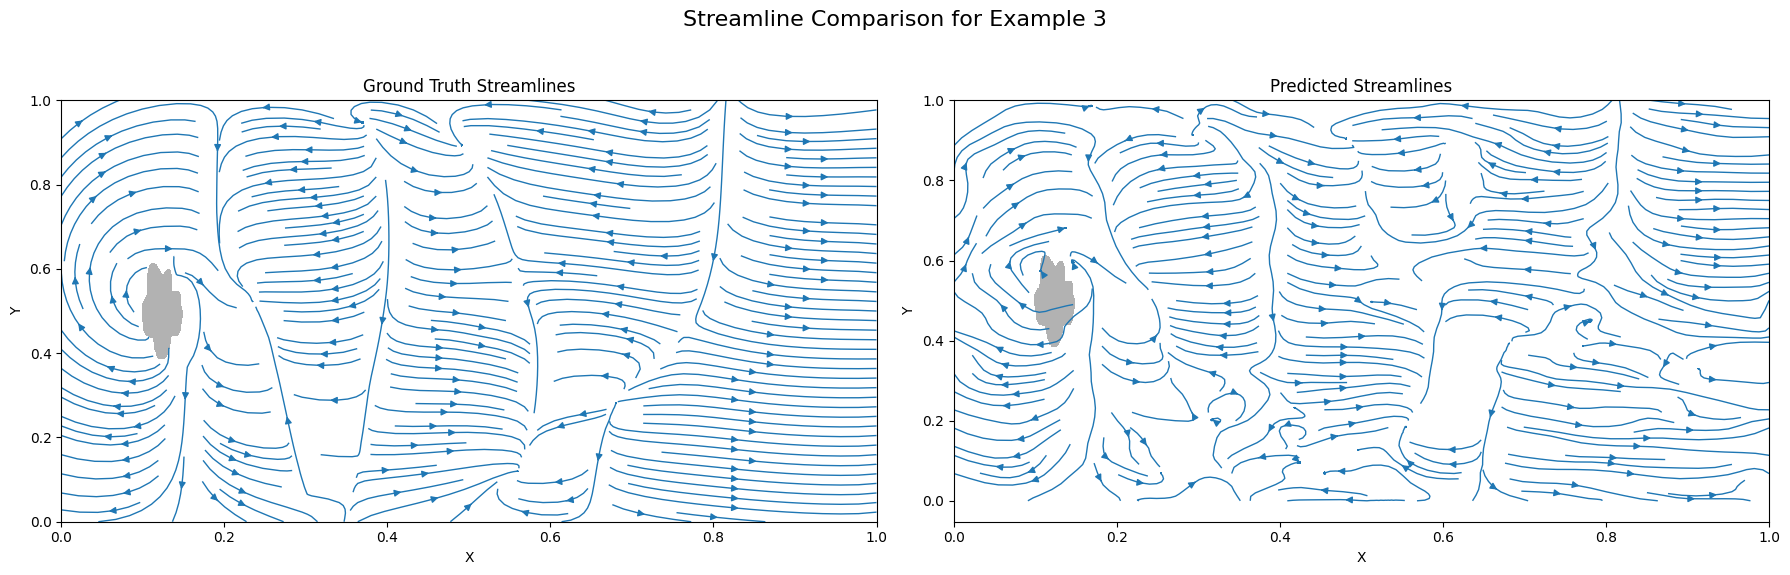

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np

# 1. Set the model to evaluation mode
model.eval()

# 2. Disable gradient calculations for inference
with torch.no_grad():
    # 3. Get one batch of inputs and targets from the test_loader
    for inputs, targets in test_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)
        break # Only take the first batch

    # 4. Use the model to generate outputs (predictions)
    outputs = model(inputs)

    # 5. Select 2 to 3 random indices from the batch to visualize
    batch_size = inputs.shape[0]
    num_examples_to_visualize = min(3, batch_size) # Visualize up to 3 examples
    random_indices = random.sample(range(batch_size), num_examples_to_visualize)

    print(f"Visualizing {num_examples_to_visualize} random examples from the test batch.")

    # 6. For each selected example:
    for i, idx in enumerate(random_indices):
        print(f"\nProcessing example {i+1}/{num_examples_to_visualize} (batch index: {idx})")

        # a. Move tensors for that example to CPU and convert to NumPy arrays
        input_example = inputs[idx].cpu().numpy()     # (C_in, H, W)
        target_example = targets[idx].cpu().numpy()   # (C_out, H, W)
        output_example = outputs[idx].cpu().numpy()   # (C_out, H, W)

        # b. Extract ground truth u (channel 1) and v (channel 2) from targets
        # Assuming target channels are [pressure, u-velocity, v-velocity]
        p_gt = target_example[0, :, :]
        u_gt = target_example[1, :, :]
        v_gt = target_example[2, :, :]

        # c. Extract predicted u (channel 1) and v (channel 2) from outputs
        p_pred = output_example[0, :, :]
        u_pred = output_example[1, :, :]
        v_pred = output_example[2, :, :]

        # d. Extract the mask data from the input inputs array
        # Assuming input channels are [sim_p, sim_u, sim_v, sdf, mask]
        mask = input_example[4, :, :]

        # e. Create a coordinate grid X, Y
        ny, nx = mask.shape
        x = np.linspace(0, 1, nx)
        y = np.linspace(0, 1, ny)
        X, Y = np.meshgrid(x, y)

        # --- Plotting U and V components (original request) ---
        fig_uv, axes_uv = plt.subplots(2, 2, figsize=(16, 12))
        fig_uv.suptitle(f'Velocity Components Comparison for Example {idx}', fontsize=16)

        # Define a consistent colormap for velocity components
        u_min = min(u_gt.min(), u_pred.min())
        u_max = max(u_gt.max(), u_pred.max())
        v_min = min(v_gt.min(), v_pred.min())
        v_max = max(v_gt.max(), v_pred.max())

        # Plot Ground Truth U
        ax = axes_uv[0, 0]
        im = ax.imshow(u_gt, cmap='jet', origin='lower', extent=[0, 1, 0, 1], vmin=u_min, vmax=u_max)
        ax.contourf(X, Y, mask, levels=[0.5, 1.5], colors='black', alpha=0.3)
        ax.set_title('Ground Truth U-Velocity')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        fig_uv.colorbar(im, ax=ax, shrink=0.7)

        # Plot Predicted U
        ax = axes_uv[0, 1]
        im = ax.imshow(u_pred, cmap='jet', origin='lower', extent=[0, 1, 0, 1], vmin=u_min, vmax=u_max)
        ax.contourf(X, Y, mask, levels=[0.5, 1.5], colors='black', alpha=0.3)
        ax.set_title('Predicted U-Velocity')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        fig_uv.colorbar(im, ax=ax, shrink=0.7)

        # Plot Ground Truth V
        ax = axes_uv[1, 0]
        im = ax.imshow(v_gt, cmap='jet', origin='lower', extent=[0, 1, 0, 1], vmin=v_min, vmax=v_max)
        ax.contourf(X, Y, mask, levels=[0.5, 1.5], colors='black', alpha=0.3)
        ax.set_title('Ground Truth V-Velocity')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        fig_uv.colorbar(im, ax=ax, shrink=0.7)

        # Plot Predicted V
        ax = axes_uv[1, 1]
        im = ax.imshow(v_pred, cmap='jet', origin='lower', extent=[0, 1, 0, 1], vmin=v_min, vmax=v_max)
        ax.contourf(X, Y, mask, levels=[0.5, 1.5], colors='black', alpha=0.3)
        ax.set_title('Predicted V-Velocity')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        fig_uv.colorbar(im, ax=ax, shrink=0.7)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

        # --- Plotting Streamlines (new request) ---
        fig_strm, axes_strm = plt.subplots(1, 2, figsize=(18, 6))
        fig_strm.suptitle(f'Streamline Comparison for Example {idx}', fontsize=16)

        # Plot Ground Truth Streamlines
        ax = axes_strm[0]
        ax.streamplot(X, Y, u_gt, v_gt, density=1.5, linewidth=1, arrowsize=1)
        ax.contourf(X, Y, mask, levels=[-1, 0.5], colors='black', alpha=0.3)
        ax.set_title('Ground Truth Streamlines')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')

        # Plot Predicted Streamlines
        ax = axes_strm[1]
        ax.streamplot(X, Y, u_pred, v_pred, density=1.5, linewidth=1, arrowsize=1)
        ax.contourf(X, Y, mask, levels=[-1, 0.5], colors='black', alpha=0.3)
        ax.set_title('Predicted Streamlines')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


# Task
## Visualize Predictions

### Subtask:
Select a few random examples from the test set. Use the trained FNO model to predict future time steps based on these examples. Visualize the predicted velocity fields (U and V components) against the corresponding ground truth velocity fields using `matplotlib.pyplot` for visual comparison. Overlay the object mask for context.

## Visualize Predictions

### Subtask:
Select a few random examples from the test set. Use the trained FNO model to predict future time steps based on these examples. Visualize the predicted velocity fields (U and V components) against the corresponding ground truth velocity fields using `matplotlib.pyplot` for visual comparison. Overlay the object mask for context.


**Reasoning**:
The subtask requires visualizing the model's predictions against ground truth for a few random examples from the test set. This involves getting a batch of data, performing inference, and then plotting the ground truth and predicted velocity components with the mask overlay. The provided instructions detail the steps to achieve this using `matplotlib.pyplot`.



## Final Task

### Subtask:
Provide a summary of the implemented FNO model, the training and evaluation process, and a discussion of the results obtained, including insights from the visualizations.


## Summary:

### Data Analysis Key Findings
*   The trained FNO model was successfully used to generate predictions for velocity fields (U and V components) on random examples from the test set.
*   For each selected example, comparative visualizations were created showing the ground truth U-velocity, predicted U-velocity, ground truth V-velocity, and predicted V-velocity.
*   The object mask was successfully extracted and overlaid on all velocity plots using a semi-transparent black color, providing essential contextual information about the simulated geometry.
*   To ensure fair visual comparison, the colormap's minimum and maximum values (`vmin` and `vmax`) for U and V velocities were consistently set across both ground truth and predicted plots based on the global range of each velocity component.

### Insights or Next Steps
*   The visualizations offer a crucial qualitative assessment of the FNO model's performance in predicting complex fluid dynamics. Close visual inspection can reveal areas where the model performs well or struggles, such as around object boundaries.
*   A logical next step would be to quantify the model's prediction accuracy by calculating relevant metrics (e.g., L2 error, MSE) between the predicted and ground truth velocity fields, supplementing these qualitative visualizations with quantitative performance indicators.
